<a href="https://colab.research.google.com/github/zxxoxnee/Machine-Learning/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84%EB%A5%BC_%EA%B7%B8%EB%A6%AC%EB%8A%94_plotting_%EB%8F%84%EA%B5%AC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 그래프를 그리는 plotting 도구: matplotlib, seaborn

In [3]:
# numpy, pandas 임포트
import numpy as np
import pandas as pd

## 데이터 준비
### **먼저 아래 링크에서 stock.adj_close.csv 파일을 다운로드 받고, colab에 업로드합니다.**
#### https://drive.google.com/file/d/1AnWjtW9bdIqBEnxeOMfST_Pxx2IVQfMJ/view?usp=sharing

In [4]:
주가_데이터 = pd.read_csv('stock.adj_close.csv', index_col=0)
my_series = 주가_데이터.loc['A005930']['2020-09-09':]
my_df = 주가_데이터.T.loc['2020-09-09':,'A005900':'A006000']
my_df_2 = my_df.loc[:'2020-09-11','A005960':]

In [5]:
trafic_data = pd.DataFrame(
    [[9800,5500,7000],[10200,6600,6500],[7800,4500,8700]],
    index=['10/22','10/23','10/24'],
    columns=['원티드','사람인','중고나라'])
trafic_data   # trafic_data 라는 DataFrame 생성

,원티드,사람인,중고나라
10/22,9800,5500,7000
10/23,10200,6600,6500
10/24,7800,4500,8700


# matplotlib으로 그래프 그리기

In [12]:
# COLAB 환경을 위한 나눔고딕 한글폰트 설치  --> 진행 후,  런타임 > 런타임 다시 시작을 해 주세요. 다시 시작 후에는 이 부분 실행 X #런타임 다시 시작해야함.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,193 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

In [1]:
# matplotlib 임포트,  주피터 출력설정,  한글 글꼴 지정
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'  # (Colab 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용)
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)

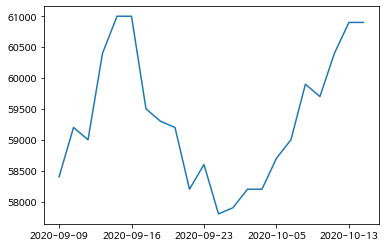

In [6]:
my_df.loc[:,'A005930'].plot();  # Series 그래프

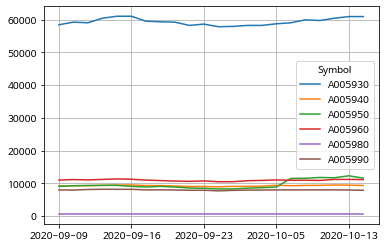

In [7]:
my_df.plot(grid=True);  # DataFrame 그래프

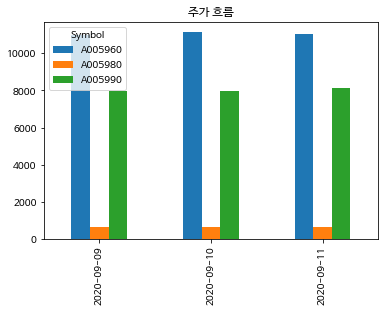

In [8]:
my_df_2.plot(kind='bar', title='주가 흐름');

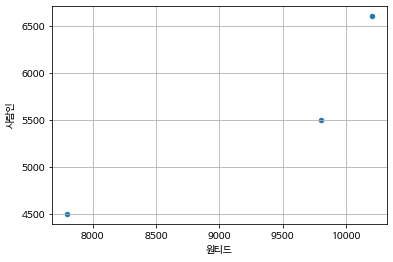

In [9]:
trafic_data.plot(kind='scatter', grid=True,
                 x='원티드', y='사람인');

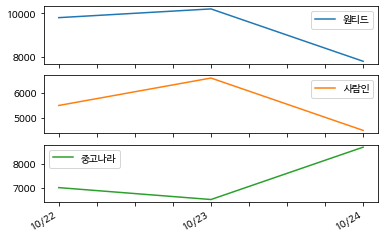

In [10]:
trafic_data.plot(subplots=True);

### <연습문제>
trafic_data에서  '중고나라'의 일자별 Bar 그래프를 그려보세요

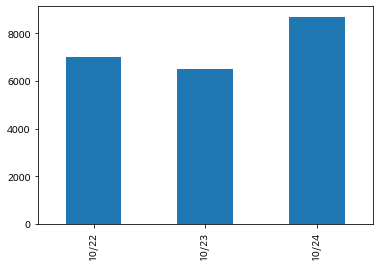

In [12]:
trafic_data.loc[:,'중고나라'].plot(kind='bar');

# seaborn 으로 데이터 분포 살펴보기

In [13]:
# seaborn 임포트,  한글 글꼴 지정
import seaborn as sns
sns.set()
plt.rc('font', family='NanumBarunGothic')

In [14]:
tips = sns.load_dataset('tips')  # 내장 데이터 셋 불러오기

In [15]:
tips.head()    # dataframe의 앞부분만 살펴보기

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


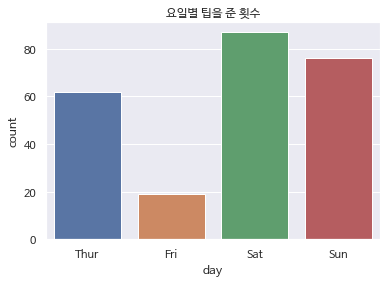

In [16]:
sns.countplot(data=tips, x='day');
plt.title('요일별 팁을 준 횟수');

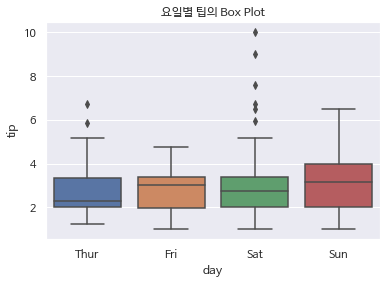

In [17]:
sns.boxplot(data=tips, x='day', y='tip');
plt.title('요일별 팁의 Box Plot');

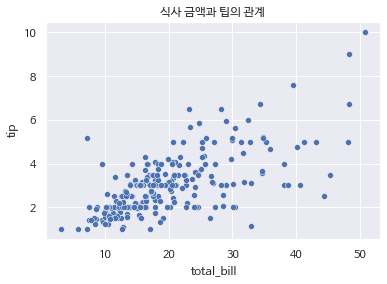

In [18]:
sns.scatterplot(data=tips, x='total_bill', y='tip');
plt.title('식사 금액과 팁의 관계');

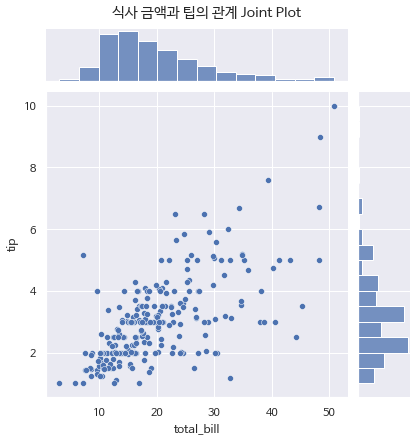

In [19]:
sns.jointplot(data=tips, x="total_bill", y="tip");
plt.suptitle("식사 금액과 팁의 관계 Joint Plot", y=1.02);

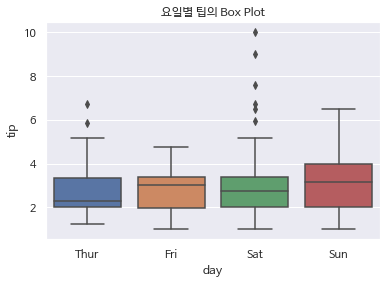

In [20]:
sns.boxplot(data=tips, x='day', y='tip');
plt.title('요일별 팁의 Box Plot');

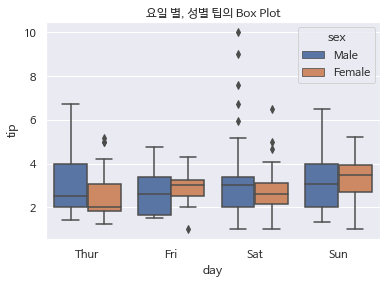

In [21]:
sns.boxplot(data=tips, x='day', y='tip', hue='sex');
plt.title('요일 별, 성별 팁의 Box Plot');

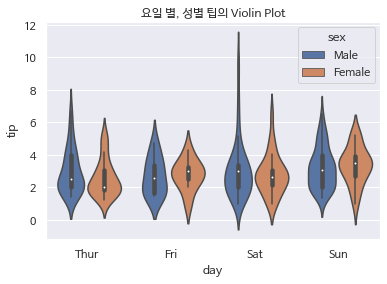

In [22]:
sns.violinplot(data=tips, x="day", y="tip", hue="sex")
plt.title("요일 별, 성별 팁의 Violin Plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


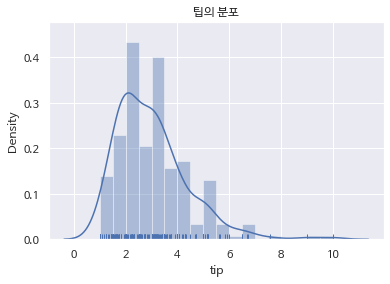

In [23]:
sns.distplot(tips.tip, kde=True, rug=True);
plt.title('팁의 분포');

### <연습문제>
성별 별로, 팁을 준 횟수를 차트로 그려보세요

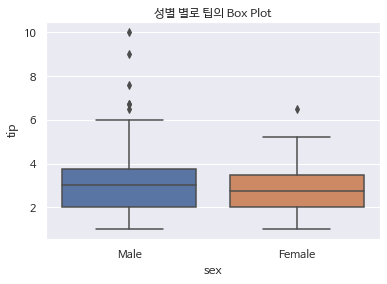

In [25]:
sns.boxplot(data=tips, x='sex', y='tip');
plt.title('성별 별로 팁의 Box Plot');